In [1]:
import numpy as np
import pandas as pd
pd.set_option('display.float_format', lambda x: '%.3f' % x)

import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import datasets
from sklearn import model_selection

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [2]:
# load dataset
raw = datasets.load_breast_cancer()
X = raw.data
y = raw.target

In [3]:
# prepare configuration for cross validation test harness
seed = 7

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, 
                                                                    y, 
                                                                    test_size=0.15, 
                                                                    random_state=seed)

In [4]:
# prepare models
models = []

models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('RF', RandomForestClassifier(n_estimators=100)))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

In [5]:
# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'

In [6]:
#Test the performance of each model against the data, using cross-validation
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=seed) #prepare K-fold CV
    cv_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring) #cross-validate model using K-fold CV
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.946131 (0.034842)
LDA: 0.958631 (0.015869)
KNN: 0.933801 (0.022141)
CART: 0.925468 (0.044698)
RF: 0.950255 (0.021349)
NB: 0.935672 (0.023838)
SVM: 0.624745 (0.065053)


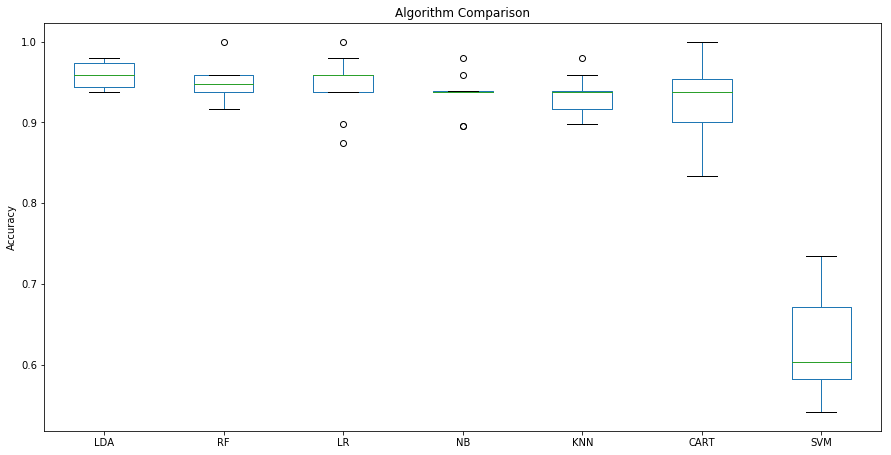

In [7]:
df = pd.DataFrame(results, names).T
summary = df.mean(axis=0).sort_values(ascending=False)
order = list(summary.index)
df = df[order]

viz = df.plot(kind='box',
        title='Algorithm Comparison',
             figsize=(15,7.5))
viz.set_ylabel('Accuracy')